
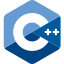
<br>

<div style="text-align:center; font-size:200%;">
 <b>GoF: Template Method Pattern</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 11 GoF Template Method Pattern.ipynb -->
<!-- slides/module_450_design_patterns/topic_210_template_method.cpp -->

## Template Method (Behavioral Pattern)

### Zweck

Definiere ein Verhalten oder einen Algorithmus, in dem bestimmte Schritte zur
Implementierung oder Modifikation in Unterklassen vorgesehen sind. Die
Unterklassen können individuelle Schritte, die vom Algorithmus ausgeführt
werden überschreiben, haben aber keinen Einfluss auf seine Gesamtstruktur.


## Template Method (Behavioral Pattern)

### Motivation

- Eine Anwendung, die mit verschiedenen Arten von Dokumenten umgehen muss.
- In manchen Operationen der Anwendung gibt es Gemeinsamkeiten, aber auch
  Unterschiede zwischen den verschiedenen Dokumenten
- Z.B. ist der Ablauf zum Speichern eines Dokuments immer gleich, aber die
  Art und Weise, wie die einzelnen Dokumenttypen gespeichert werden, ist
  unterschiedlich
- Die Anwendung definiert konkrete Operationen, die abstrakte Operationen
  aufrufen, die Teil ihrer Ausführung sind
- Instanzen der Anwendung implementieren die virtuellen Methoden


### Klassendiagramm

<img src="img/template_method_example.svg"
     style="display:block;margin:auto;width:40%"/>

In [ ]:
#include <iostream>
#include <string>

In [ ]:
class Document {
public:
  virtual ~Document() = default;

  void Save() const {
    std::cout << "Saving to existing file.\n";
    DoSave();
    std::cout << "Document saved.\n\n";
  }

  void SaveAs() const {
    std::cout << "Asking user for file name.\n";
    DoSave();
    std::cout << "Document saved.\n\n";
  }

protected:
    virtual void DoSave() const = 0;
};

In [ ]:
class TextDocument : public Document {
  void DoSave() const override {
    std::cout << "-> Saving text document in DOCX format.\n";
  }
};

In [ ]:
class SpreadsheetDocument : public Document {
  void DoSave() const override {
    std::cout << "-> Saving spreadsheet in XLSX format.\n";
  }
};

In [ ]:
SpreadsheetDocument spreadsheet;
spreadsheet.Save();
spreadsheet.SaveAs();

In [ ]:
TextDocument text;
text.Save();
text.SaveAs();

In [ ]:
const Document* doc = &spreadsheet;
doc->Save();

In [ ]:
doc = &text;
doc->SaveAs();


## Template Method (Behavioral Pattern)

### Anwendbarkeit

- Um die invarianten Teile eines Algorithmus einmal zu implementieren und
  Verhaltensvariationen in Unterklassen zu realisieren
- Zentralisieren von gemeinsamem Verhalten in einer Klasse, um
  Code-Duplizierung zu vermeiden
- Kontrolle der Erweiterung von Verhalten durch Unterklassen


## Template Method (Behavioral Pattern)

### Structure

<img src="img/pat_template_method.svg"
     style="display:block;margin:auto;width:40%"/>


## Template Method (Behavioral Pattern)

### Teilnehmer

- `AbstractClass`:
  - definiert abstrakte *primitive Operationen*, die konkrete Unterklassen
    implementieren (Hooks)
  - implementiert eine Template-Methode, die das Skelett eines Algorithmus
    definiert
- `ConcreteClass`:
  - implementiert die primitiven Operationen


## Template Method (Behavioral Pattern)

### Interaktionen

`ConcreteClass` verlässt sich auf `AbstractClass`, um die invarianten Schritte
des Algorithmus zu implementieren


## Template Method (Behavioral Pattern)

### Consequences

- Template Methods sind eine grundlegende Strategie, zur Wiederverwendung von
  Code
- Sie führen zu einem invertierten Kontrollfluss, der oft als "Hollywood
  Prinzip" bezeichnet wird ("Don't call us, we'll call you")
- Es ist für Template Methods essentiell, klar zu definieren, welche
  Methoden überschrieben werden *müssen* und welche *optional* sind


## Workshop: Mode-Design

### Stilvolle Kleidung mit dem Template Method Pattern

Die Welt der Mode ist groß, mit unzähligen Stilen, Materialien und
Designmustern. Wenn es jedoch um den eigentlichen Herstellungsprozess
verschiedener Kleidungsstücke geht, gibt es bestimmte Schritte, die relativ
konstant bleiben. Zum Beispiel könnte der Prozess Folgendes beinhalten:
- Entwickeln eines Designmusters für das Kleidungsstück
- Auswahl des richtigen Materials
- Schneiden des Materials nach dem Muster
- Zusammennähen der Teile
- Hinzufügen von Veredelungs-Details


Ihre Aufgabe als angehender Modedesigner (und Programmierer!) ist es, einen
systematischen Ansatz zur Gestaltung verschiedener Arten von Kleidung zu
entwickeln. Aber nicht nur irgendeinen Ansatz, wir brauchen einen effizienten
und erweiterbaren Ansatz. Nehmen wir an, Sie möchten sowohl Kleider als auch
Anzüge entwerfen. Während der Gesamtprozess ähnlich ist, variieren die
Details erheblich. Wenn Sie z.B. Veredelungs-details hinzufügen, benötigen
Kleider möglicherweise Spitzen-Details, während bei Anzügen die Platzierung
der Knöpfe wichtig ist.

Das Ziel ist es, ein System zu entwickeln, in dem die generischen Schritte
einmal definiert werden, die spezifischen Schritte jedoch je nach
Kleidungsstück angepasst werden können.

1. Definieren Sie einen generischen Prozess zur Herstellung von Kleidung
   basierend auf den oben beschriebenen Schritten.
2. Identifizieren Sie Schritte, die allen Kleidungsstücken gemeinsam sind.
3. Identifizieren Sie Schritte, die für jeden Kleidungstyp einzigartig und
   spezifisch sind.
4. Implementieren Sie diesen Prozess mit dem Template Method Design Pattern
   in C++.
5. Implementieren Sie konkrete Klassen zur Herstellung von Anzügen und
   Kleidern.

In [ ]:
#include <iostream>

In [ ]:
class Clothing {
public:
    // The template method
    void DesignClothing() {
        DevelopDesignPattern();
        ChooseMaterial();
        CutPattern();
        Sew();
        AddDetails();
    }

    virtual void DevelopDesignPattern() = 0;

    virtual void ChooseMaterial() {
        std::cout << "You can't go wrong with cotton as material.\n";
    }

    void CutPattern() {
        std::cout << "Cutting based on the design pattern.\n";
    }

    void Sew() {
        std::cout << "Sewing pieces together.\n";
    }

    virtual void AddDetails() = 0;
};

In [ ]:
class Dress : public Clothing {
public:
    void DevelopDesignPattern() override {
        std::cout << "Dress: Developing a design pattern for the dress.\n";
    }

    void ChooseMaterial() override {
        std::cout << "Dress: Choosing satin material.\n";
    }

    void AddDetails() override {
        std::cout << "Dress: Adding lace and sequins to the dress.\n";
    }
};

In [ ]:
class Suit : public Clothing {
public:
    void DevelopDesignPattern() override {
        std::cout << "Suit: Developing a design pattern for the suit.\n";
    }

    void ChooseMaterial() override {
        std::cout << "Suit: Choosing wool material.\n";
    }

    void AddDetails() override {
        std::cout << "Suit: Adding buttons and pockets to the suit.\n";
    }
};

In [ ]:
class TShirt : public Clothing {
public:
    void DevelopDesignPattern() override {
        std::cout << "TShirt: Developing a design pattern for the T-Shirt.\n";
    }

    void AddDetails() override {
        std::cout << "TShirt: Adding a logo to the T-Shirt.\n";
    }
};

In [ ]:
std::cout << "Designing a Dress:\n";
Dress dress;
dress.DesignClothing();

In [ ]:
std::cout << "\nDesigning a Suit:\n";
Suit suit;
suit.DesignClothing();

In [ ]:
std::cout << "\nDesigning a T-Shirt:\n";
TShirt tShirt;
tShirt.DesignClothing();